<a href="https://colab.research.google.com/github/Arashsm/Timeseries_forcasting_corono_dataset/blob/main/Country_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#countrygroups library 
# !pip install countrygroups
from countrygroups import EUROPEAN_UNION
!pip install tslearn
from tslearn.metrics import soft_dtw
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 3.9 MB/s 


In [ ]:

EU = EUROPEAN_UNION.names
df = pd.read_csv('covid_19_data.csv',parse_dates=['ObservationDate'])
pop = pd.read_csv('population_by_country_2020.csv')
pop.set_index('Country (or dependency)' ,inplace= True)
pop.rename(index={'Czech Republic (Czechia)' : 'Czechia'}, inplace = True)

In [ ]:
group_var = ['ObservationDate','Country/Region']
out_var = ['Confirmed' ]
base = df.groupby(group_var)[out_var].sum().reset_index()
base.set_index('ObservationDate', inplace=True)

In [ ]:
EU_dict = {}
for country in EU:
    EU_dict[country] = base[base['Country/Region'] == country]

In [ ]:
# here the covid cases are normalized based on their population
for key in EU_dict:
    EU_dict[key] = EU_dict[key].resample('W').sum()
    EU_dict[key]['per_week'] = EU_dict[key]['Confirmed'] - EU_dict[key]['Confirmed'].shift(1)
    EU_dict[key] = EU_dict[key][1:-1]
    population = pop.at[key, 'Population (2020)' ]
    norm = population/100
    EU_dict[key].div(norm) 
    EU_dict[key] = EU_dict[key]['per_week']

In [ ]:
EU_DF = pd.DataFrame(EU_dict, columns = EU_dict.keys() )

In [ ]:
EU_DF.drop("Czechia", axis=1, inplace=True)
EU_DF.dropna(inplace = True)

In [ ]:
EU_DFT =  EU_DF.transpose()
EU_DFT = EU_DFT.iloc[: , :-1]

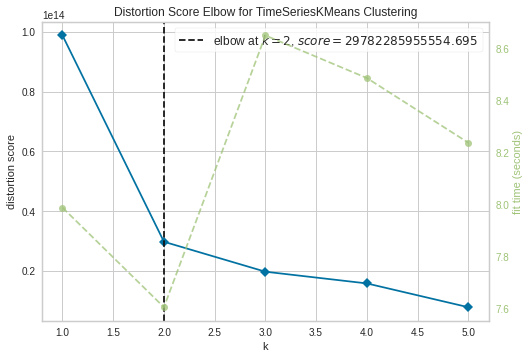

In [ ]:
# Softdtw has been choosen as clustering metric 
model = TimeSeriesKMeans(metric="softdtw")
# finding the number of clusters
visualizer = KElbowVisualizer(model, k=(1,6), metric='distortion') 
visualizer.fit(EU_DFT)
visualizer.show()


In [ ]:
#clustering using Kmeans 
model = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True)
clus = model.fit_predict(EU_DFT)
EU_DFT["Cluster"] = clus

780694933878429930487808.000 --> 97589718449276472786944.000 --> 97587445411265516666880.000 --> 97428131447055539240960.000 --> 97429867872609521106944.000 --> 97430594832602174062592.000 --> 97430566194002071126016.000 --> 97430214324062722719744.000 --> 97430095163147985879040.000 --> 97437830890421733031936.000 --> 97443435127026594349056.000 --> 97446198369613017776128.000 --> 97446185521558862168064.000 --> 97446159341179247788032.000 --> 97446242675975281180672.000 --> 97409820472507333869568.000 --> 97426680181234394464256.000 --> 97426733411402160013312.000 --> 97423786591730456854528.000 --> 97426667566369062518784.000 --> 97426563881861700911104.000 --> 97426612974621284106240.000 --> 97426555823263838109696.000 --> 97426418883819005280256.000 --> 97426507721633607712768.000 --> 97426554227141466128384.000 --> 97441658886460645834752.000 --> 97441531155881465479168.000 --> 97441503803165630267392.000 --> 97441422204622256209920.000 --> 97441139341849035538432.000 --> 9744118

In [ ]:
EU_DF1 = EU_DFT.transpose()
EU_DF1

,Austria,Belgium,Bulgaria,Croatia,Cyprus,Denmark,Estonia,Finland,France,Germany,...,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden
ObservationDate,,,,,,,,,,,,,,,,,,,,,
2020-03-22 00:00:00,11911.0,10787.0,645.0,713.0,358.0,4639.0,1451.0,2121.0,57538.0,90436.0,...,2529.0,315.0,13896.0,2208.0,5197.0,1510.0,697.0,1493.0,101207.0,5845.0
2020-03-29 00:00:00,32179.0,32383.0,1113.0,2694.0,632.0,5738.0,1692.0,3845.0,130175.0,202854.0,...,7439.0,533.0,35143.0,6195.0,20449.0,5877.0,844.0,1831.0,273436.0,9570.0
2020-04-05 00:00:00,30024.0,62440.0,1261.0,3428.0,1363.0,11128.0,2632.0,4380.0,208934.0,274769.0,...,6971.0,432.0,49823.0,12167.0,36463.0,12348.0,1224.0,2146.0,375689.0,18468.0
2020-04-12 00:00:00,15434.0,66848.0,1152.0,2865.0,1457.0,14709.0,2326.0,7066.0,209810.0,228714.0,...,4619.0,917.0,51317.0,18048.0,36489.0,15982.0,1752.0,1644.0,291115.0,24396.0
2020-04-19 00:00:00,8666.0,66181.0,1255.0,2520.0,1192.0,9312.0,1518.0,5560.0,360767.0,146358.0,...,2247.0,595.0,52426.0,17018.0,30914.0,17472.0,2060.0,1051.0,218281.0,25505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-25 00:00:00,111075.0,173277.0,82712.0,106774.0,40196.0,36763.0,21336.0,12961.0,1548197.0,1000066.0,...,8838.0,1931.0,399388.0,628415.0,24190.0,138068.0,30262.0,35417.0,413157.0,276227.0
2021-05-02 00:00:00,98984.0,157985.0,64553.0,96295.0,35626.0,33967.0,17326.0,10831.0,1275506.0,953000.0,...,8553.0,1190.0,373582.0,384372.0,22127.0,96370.0,25040.0,32703.0,411058.0,252194.0
2021-05-09 00:00:00,76033.0,145552.0,36867.0,76347.0,24124.0,40761.0,17514.0,10118.0,955668.0,796422.0,...,7012.0,1017.0,360798.0,244181.0,17499.0,64445.0,20245.0,33694.0,321508.0,242643.0


In [ ]:
def plots(model):
    layout = (1, 3)
    clus1  = plt.subplot2grid(layout, (0, 0))
    clus2  = plt.subplot2grid(layout, (0, 1))
    clus3 = plt.subplot2grid(layout, (0, 2))
    
    plt.plot(model.cluster_centers_[0].ravel(), "r-")
    plt.plot(model.cluster_centers_[1].ravel(), "r-")
    plt.plot(model.cluster_centers_[2].ravel(), "r-")
    sns.despine()
    plt.tight_layout()

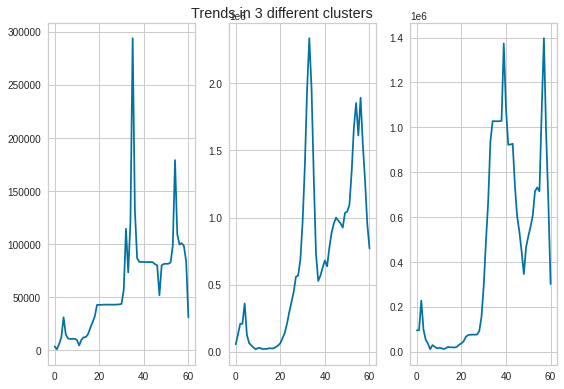

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Trends in 3 different clusters')
ax1.plot(model.cluster_centers_[0].ravel())

ax2.plot(model.cluster_centers_[1].ravel())

ax3.plot(model.cluster_centers_[2].ravel())

plt.tight_layout()
plt.show()